# ボストン近郊の住宅地住宅価格

In [1]:
import pandas as pd
import numpy as np
import mglearn
import mglearn.datasets as mgdata # cachedir='cache' を location='cache'に変更
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 線形回帰モデル
from sklearn.linear_model import Ridge # リッジ回帰 L2正則化 モデル

In [2]:
boston = load_boston()
boston.data.shape

C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

(506, 13)

In [3]:
X, y = mgdata.load_extended_boston() # 各特徴量間の積を追加したデータセット読み込み
X.shape

(506, 104)

13の特徴量から2つの特徴量の積を計算した結果 91個の特徴量が加算

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print(lr.coef_[0]) # 係数(傾き)
print(lr.intercept_) # 切片

-412.7109467048848
30.934563673645286


In [10]:
print("Training score : {:.2F}".format(lr.score(X_train, y_train)))
print("Test score : {:.2F}".format(lr.score(X_test, y_test)))

Training score : 0.95
Test score : 0.61


訓練データに対しテストデータのスコアが低くなっている。  
過剰適合が起きている兆候である。  
複雑度を制御できるモデルを使用する。

# リッジ回帰 L2正則化

In [11]:
ridge = Ridge().fit(X_train, y_train)
print("Training score : {:.2F}".format(ridge.score(X_train, y_train)))
print("Test score : {:.2F}".format(ridge.score(X_test, y_test)))

Training score : 0.89
Test score : 0.75


線形回帰の時より訓練データのスコアは低くなったが、テストデータに対するスコアは高くなった。  
過剰適合の危険性が少ない、汎化性の高いモデルである事が分かる。

In [12]:
# 訓練データとテストデータどちらに重きを置くか alpha ﾊﾟﾗﾒｰﾀで調整を行う
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training score : {:.2F}".format(ridge10.score(X_train, y_train)))
print("Test score : {:.2F}".format(ridge10.score(X_test, y_test)))

Training score : 0.79
Test score : 0.64


alpha が増えると係数は0に近くなり訓練データ・テストデータ両方のスコアは低くなってしまった。  

In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training score : {:.2F}".format(ridge01.score(X_train, y_train)))
print("Test score : {:.2F}".format(ridge01.score(X_test, y_test)))

Training score : 0.93
Test score : 0.77


alpha を小さくすると係数への制約がないため、線形回帰と同じような結果となる。  
今回は、alpha を小さくした方が精度は高くなった。

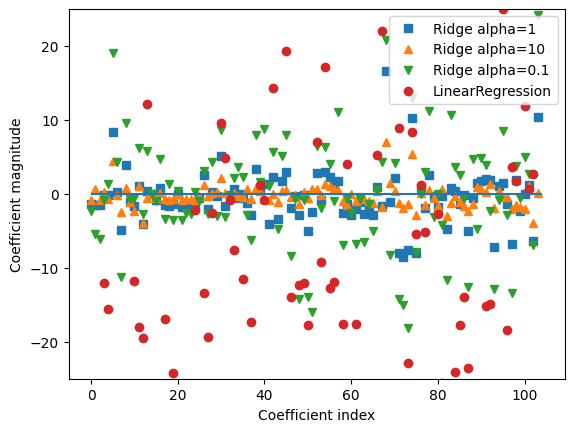

In [14]:
plt.plot(ridge.coef_, 's', label = 'Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label = 'Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

X軸は係数の要素, 縦軸は特徴量に対する係数。  
alpha が10, 1, 0.1, 0(線形回帰) と少なくなるにつれて係数のばらつきが大きくなっていることが確認できる。

C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

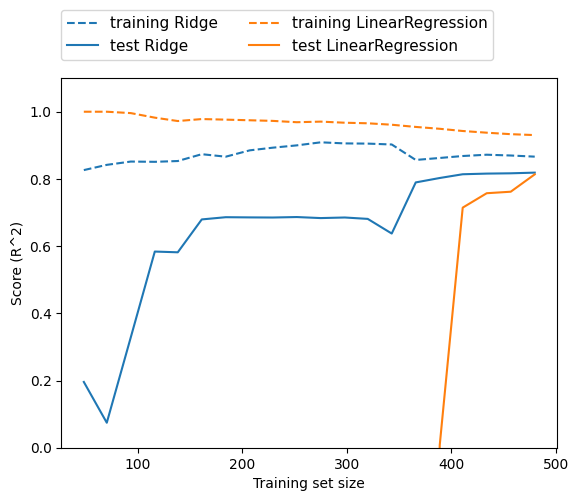

In [15]:
mglearn.plots.plot_ridge_n_samples()

訓練データのスコアはテストよりも大きい。  
データサイズが小さい場合はリッジ回帰の方がテストスコアが良い。  
しかし、最終的にリッジ回帰と線形回帰のテストスコアが同じになっているため、データ量が多い場合は正則化はあまり重要ではないという事が分かる。  
※線形回帰ではデータ量が多くなると訓練データのスコアも下がってくる(モデルの過剰適合または、データを覚えることが困難になるため)

# Lasso L1正則化

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features userd: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features userd: 4


訓練、テストともにスコアが非常に低い結果となった。  
特徴量を4つしか使用していないことから適合不足である事が分かる。  
alpha を減らして適合不足の度合いを減らすように調整を行う。

In [18]:
# max_iter を増やさないと警告が表示される
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features userd: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features userd: 33


特徴量の使用量が増えてスコアが向上しているのが確認できる。  
さらに alpha の値を下げてみる。

In [19]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features userd: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features userd: 96


訓練データのスコアは向上したが、テストデータのスコアが減少したことから、過剰適合が発生しているようだ。  
今回は alpha=0.01 あたりが良い結果となるようだ。

Text(0, 0.5, 'Coefficient magnitude')

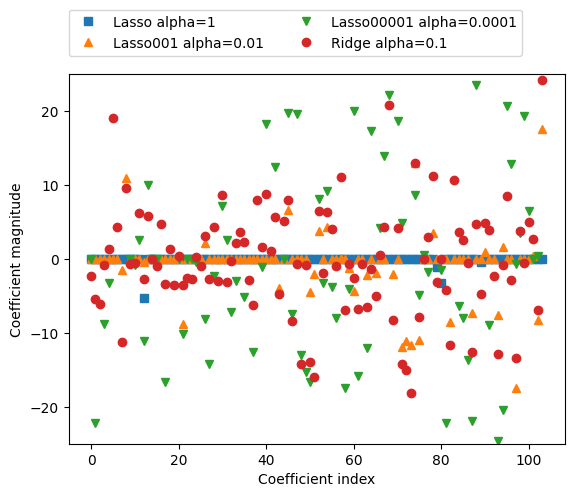

In [22]:
# プロットの作成
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso001 alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso00001 alpha=0.0001")

plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

alpha=1 の係数はほとんど0であり、他の場合でも小さいことが分かる。  
Lasso は重要な特徴量が少ない場合や、使用する特徴量を少なくして解釈したい場合に使用すると使いやすいモデルが作成できるだろう。